In [1]:
import qiskit
import numpy as np # define random numbers
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
#from qiskit.extensions import initialize
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text
# import the following operator
from qiskit.quantum_info import Operator

In [2]:
def qft_dagger(qc, n):
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/float(2**(j-m)), m, j) #-pi because of the inversion
        qc.h(j)

In [4]:
def qpe_main(circuit, angle, target_qubits):
    repetitions = 1
    for control_qubit in range(target_qubits):
        for i in range(repetitions):
            circuit.cp(angle, control_qubit, target_qubits)
        repetitions *= 2 # 2^0, 2^1, 2^2        

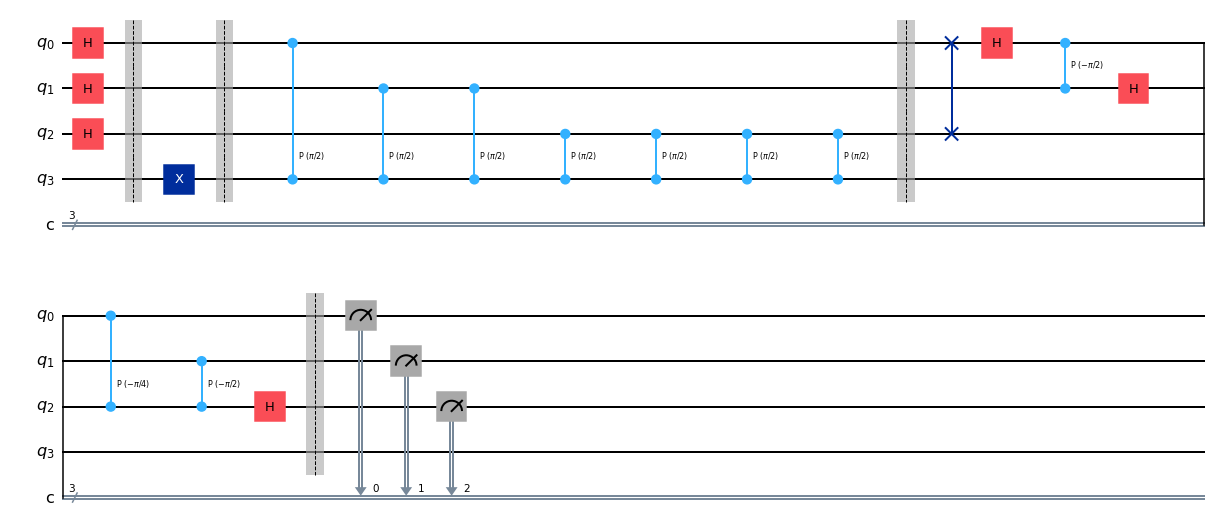

In [8]:
# find the phase of the S gate
angle = pi/2

qpe = QuantumCircuit(4,3)

for i in range(3):
    qpe.h(i)
    
qpe.barrier()

qpe.x(3)
qpe.barrier()

qpe_main(qpe, angle, 3)
qpe.barrier()

qft_dagger(qpe, 3)# inverse of qft
qpe.barrier()

for i in range(3):
    qpe.measure(i, i)
qpe.draw('mpl')

# QASM Simulator


Total counts are:  {'010': 1000}


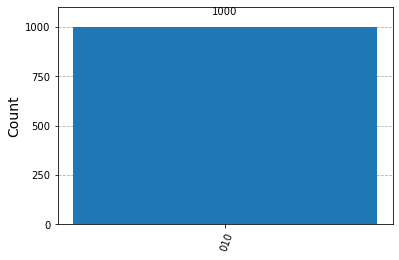

In [10]:
backend = Aer.get_backend('qasm_simulator')

qpe_algo = transpile(qpe, backend)

job = backend.run(qpe_algo, shots = 1000)

result = job.result()

counts = result.get_counts(qpe)

print("\nTotal counts are: ", counts)

plot_histogram (counts)

## 010 in binary = 2 in decimal which is a solution by QPE
## solution/ 2^n = 2/2^3 = 1/4 = \theta